In [4]:
import numpy as np
import matplotlib.pyplot as plt
import struct
import scipy.io.wavfile as wav
import os
import time
from IPython.display import clear_output
from Scripts import speechrate
plt.ion()

In [5]:
print(os.getcwd())

SAMPLING_RATE = 44100
FILE_DURATION = 5 # Seconds

C:\Users\truon\Desktop\MayRecord31st\MayRecord31st


First file created!
Entering loop...

Reading file mic001.raw


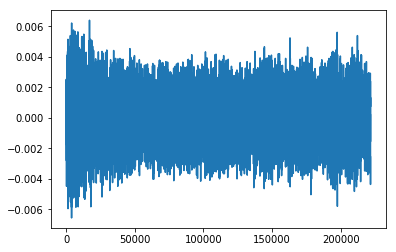

timepeak: []


IndexError: index 1 is out of bounds for axis 0 with size 0

In [9]:
# Wait for first file to be written
while not os.path.exists("Scripts/mic001.raw"):
    time.sleep(1)

print("First file created!")
print("Entering loop...\n")
filecount = 1

while True:
    try:
        # Get file size
        fileSize = os.path.getsize('Scripts/mic%03d.raw' %filecount)//4
        
        # Check if file is broken or corrupted 
        if fileSize < FILE_DURATION*SAMPLING_RATE:
            print("File is smaller than what it should be")
            raise IOError("corrupted")
        
        # Initialize numpy array
        fileData = np.zeros(fileSize, dtype= np.float16)
        
        with open("Scripts/mic%03d.raw" %filecount, "rb") as f:
            print("Reading file mic%03d.raw" %filecount)
            x=0
            while x<fileSize:
                try:
                    # Unpack the bytes into float and store result in array
                    fileData[x] = struct.unpack('f', f.read(4))[0]
                    x = x+1
                except:
                    continue
            
            plt.plot(fileData)
            plt.show()
            
        # Save as .wav for further bookeeping
        wav.write("wavFiles/rec%03d.wav" %filecount, SAMPLING_RATE, fileData)
        sprate = speechrate.getrate(wave_file = "wavFiles/rec%03d.wav" %filecount)
        print("Speech Rate: {}".format(sprate))
        
        filecount = filecount + 1
        clear_output(wait=True)
        
        # Wait for the file to be recorded
        time.sleep(FILE_DURATION+0.1)
        
    except IOError as e:
        # Catch broken files and inexistent file errors and exit
        print("IOError: " + str(e)) # print error to see what caused it
        print("Exiting...")
        cleanUp()
        break
        
    except KeyboardInterrupt:
        # In case we have to manually exit the program
        print("Exiting...")
        cleanUp()
        break

# send result back to unity
# try to shutdown unity from python

In [ ]:
def cleanUp():
    my_dir = "wavFiles/"
    for fname in os.listdir(my_dir):
        if fname.startswith("rec"):
            os.remove(os.path.join(my_dir, fname))
    my_dir = "Scripts/"
    for fname in os.listdir(my_dir):
        if fname.startswith("mic"):
            os.remove(os.path.join(my_dir, fname))
            
cleanUp()